# NLP Email classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [6]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [7]:
df['msg_length'] = df['text'].apply(len)

In [8]:
df.head()

,text,spam,msg_length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


<Axes: xlabel='msg_length', ylabel='Count'>

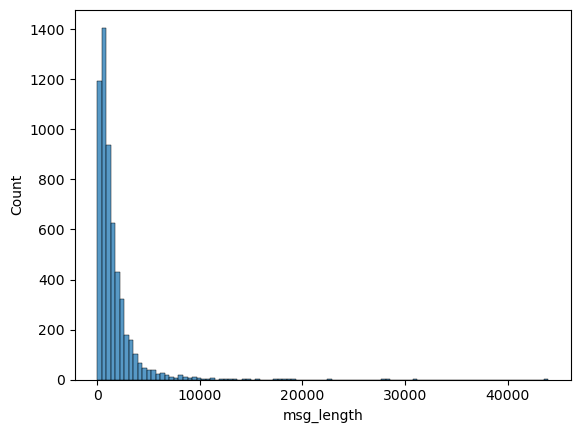

In [9]:
sns.histplot(data = df, x = 'msg_length',bins=100)

In [10]:
df['msg_length'].describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: msg_length, dtype: float64

In [11]:
df[df['msg_length']==43952]

,text,spam,msg_length
2650,Subject: from the enron india newsdesk - april...,0,43952


In [12]:
df['text'].iloc[2650]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [13]:
ham = df[df['spam'] ==0]

In [14]:
ham

,text,spam,msg_length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [15]:
spam = df[df['spam']==1]

In [16]:
spam

,text,spam,msg_length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


(0.0, 20000.0)

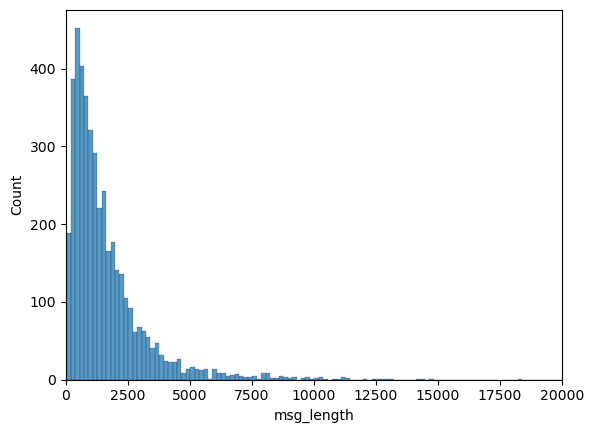

In [17]:
sns.histplot(data = ham,x = 'msg_length')
plt.xlim(0,20000)

In [18]:
ham['msg_length'].max()

43952

<Axes: xlabel='spam', ylabel='count'>

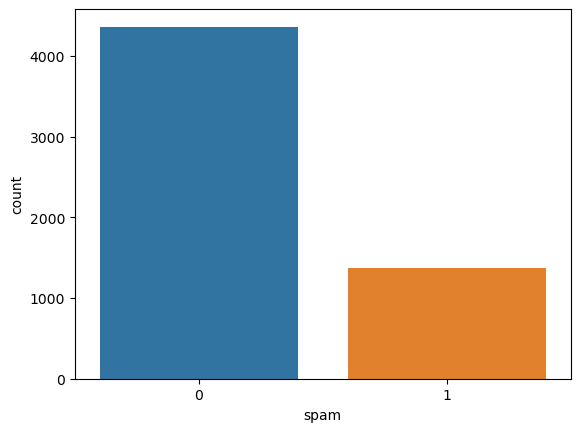

In [19]:
sns.countplot(df,x = 'spam')

In [20]:
print('ham percentage =', (len(ham)/(len(ham)+len(spam))),'%')

ham percentage = 0.7611731843575419 %


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import string


In [23]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [24]:
Test_no_punc = [char for char in Test if char not in string.punctuation]

In [48]:
Test_no_punc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [52]:
Test_no_punc_join = ''.join(Test_no_punc)

In [53]:
Test_no_punc_join 

'Hello Mr Future I am so happy to be learning AI now'

In [51]:
Test_no_punc_join.split()

['Hello',
 'Mr',
 'Future',
 'I',
 'am',
 'so',
 'happy',
 'to',
 'be',
 'learning',
 'AI',
 'now']

In [ ]:
def text_process(data):
    no_punc = [char for char in data if char not in string.punctuation]
    no_punc_join = ''.join(no_punc)
    no_punc_join_clean = char for char in no_punc_join